# Movies Analysis

**Imports**
- Pandas
- Movie Requests
- Matplotlib

In [269]:
import pandas as pd
import movie_requests as mrs
import matplotlib.pyplot as plt

**Plot Theme**

In [270]:
plt.rcParams.update({
    'axes.facecolor': '#F0F5F0',
    'figure.facecolor': '#FFF',
    'axes.edgecolor': '#FFF',
    'axes.labelcolor': '#000',
    'xtick.color': '#000',
    'ytick.color': '#000',
    'grid.color': 'lightgray',
    'grid.linestyle': '-',
    'grid.alpha': 0.7,
    'axes.grid': True,
    'axes.axisbelow': False,
    'axes.labelsize': 12,
    'axes.titlesize': 16,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'font.size': 10,
    'font.family': 'sans-serif',
})

**Data**
- Fetch OMBd data for 'oscar_winners.csv' and 'python_winners.csv'.
- Save combined data as 'movies.csv' in 'data'.
- Load 'movies.csv' into a DataFrame.

In [271]:
project_movies = mrs.res_omdb_data('oscar_winners.csv')
python_movies = mrs.res_omdb_data('python_winners.csv')
mrs.save_to_csv('movies.csv', project_movies + python_movies)
movies = pd.read_csv('data/movies.csv')

**Reused Variables**

In [272]:
titles = movies['Movie Title']
runtime = movies['Runtime']
genre = movies['Genre']
wins = movies['Award Wins']
nominations = movies['Award Nominations']
box_office = movies['Box Office']
director = movies['Director']
language = movies['Language']
plot = movies['Plot']

## Question 9.1
(Graph) What was the runtine for each movie?

**Strategy:**
- Sort the movies by runtime in descending order
- Make a list of the movie titles and runtimes


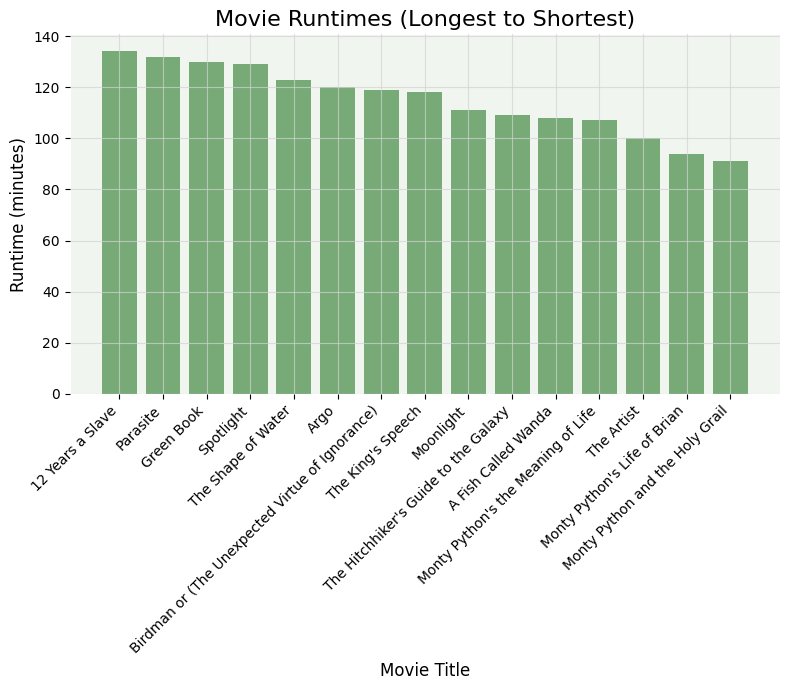

In [273]:
# Calculation
movies_by_runtime = movies.sort_values(by='Runtime', ascending=False)
sorted_titles = movies_by_runtime['Movie Title']
sorted_runtimes = movies_by_runtime['Runtime']


# Bar Plot
plt.figure(figsize=(8, 7))
plt.bar(sorted_titles, sorted_runtimes, color='#77AA77')
plt.xlabel('Movie Title')
plt.ylabel('Runtime (minutes)')
plt.title('Movie Runtimes (Longest to Shortest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Question 9.2
What movie had the longest runtime?

**Answer:**

Based on the bar plot above, the movie with the longest runtime is 12 Years a Slave, with a runtime of 134 minutes.

## Question 9.3
Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

**Strategy:**
- Calculate correlation coefficient.

In [274]:
runtime_award_corr = runtime.corr(wins)
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.60


**Answer:**

Yes, there is a positive linear correlation between runtime and award wins, with a correlation coefficient. This moderate positive correlation suggests that as a movie's runtime increases, it tends to win more awards, though other factors may also play a role.

## Question 9.4
(Graph) How many awards and nominations did each movie receive?

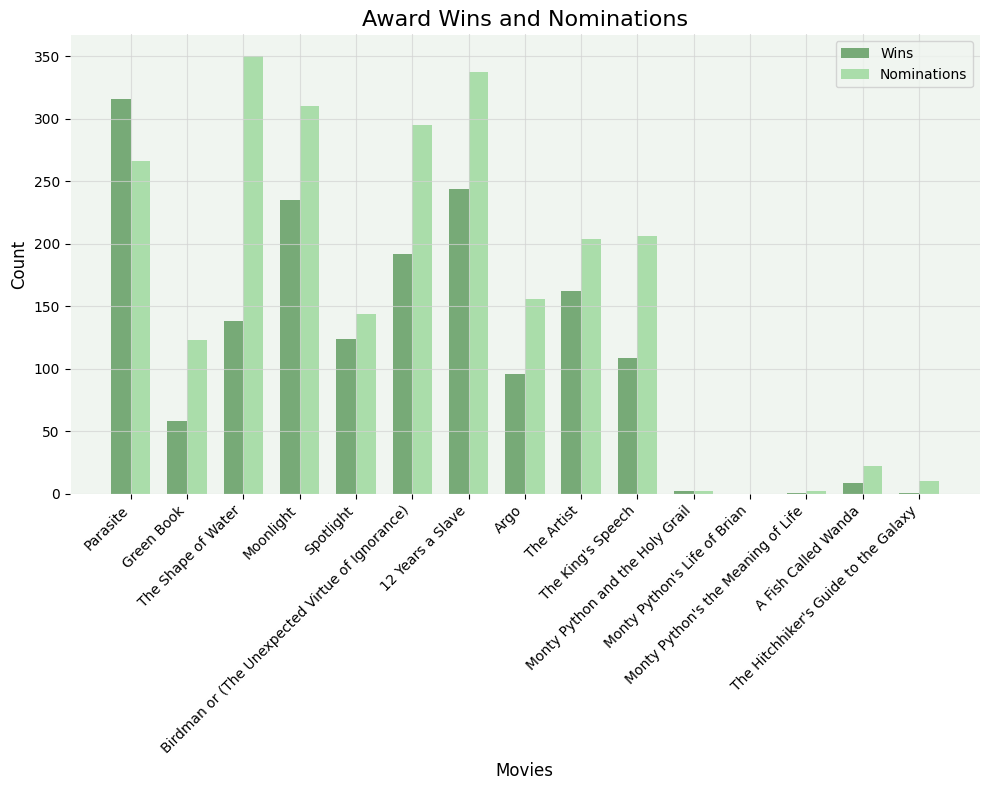

In [275]:
# Double Bar Plot
fig, ax = plt.subplots(figsize=(10, 8))
positions = list(range(len(titles)))
ax.bar([p - 0.35/2 for p in positions], wins, 0.35, label='Wins', color='#77AA77')
ax.bar([p + 0.35/2 for p in positions], nominations, 0.35, label='Nominations', color='#AADDAA')
ax.set_title('Award Wins and Nominations')
ax.set_ylabel('Count')
ax.set_xlabel('Movies')
ax.set_xticks(positions)
ax.set_xticklabels(titles, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


## Extra Credit Question 3.1
Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

In [276]:
runtime_award_corr = box_office.corr(wins + nominations)
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.19


**Answer:**

There appears to be a weak positive correlation between the amount of box office earnings a movie had and the amount of nominations it received. This suggests that higher box offic earnings do not strongly predict a higher number of awards nominations.

## Extra Credit Question 3.2
Is there a relationship between box office earnings and movie runtimes?

In [277]:
runtime_award_corr = box_office.corr(runtime)
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.48


**Answer:**

There appears to be a moderate positive correlation between box office earnings and movie runtimes. This suggests that as box office earnings increase, movie runtimes tend to increase as well, though the relationship is not particularly strong.

## Extra Credit Question 3.3
(Graph) How much did each movie earn at the box office?

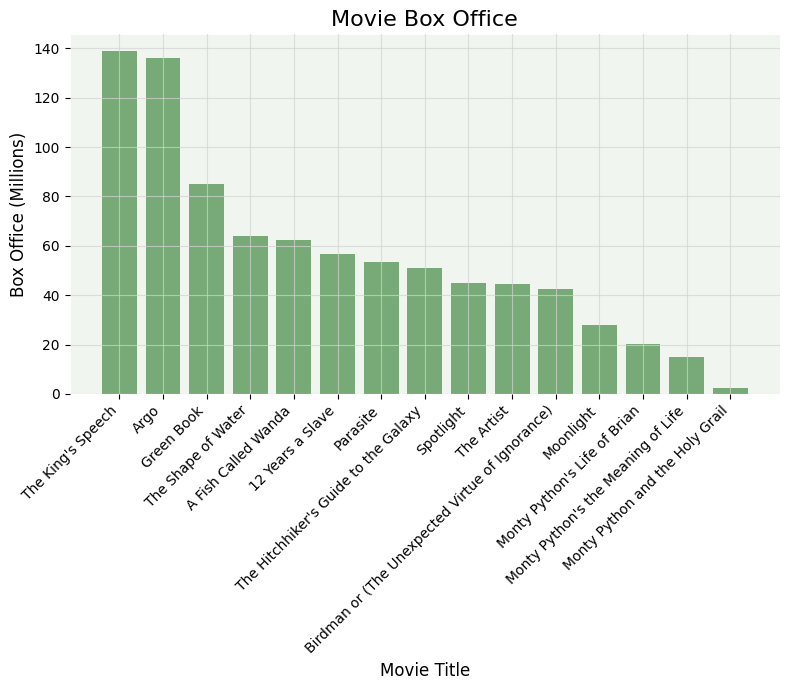

In [278]:
# Calculation
movies_by_box_office = movies.sort_values(by='Box Office', ascending=False)


# Bar Plot
plt.figure(figsize=(8, 7))
plt.bar(movies_by_box_office['Movie Title'], movies_by_box_office['Box Office']/1000000, color='#77AA77')
plt.xlabel('Movie Title')
plt.ylabel('Box Office (Millions)')
plt.title('Movie Box Office')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Extra Credit Question 3.4
(Graph) What is the total count of each genre present in the dataset? (How many times does fantasy, drama, adventure, etc. show up)

**Strategy**
- Separate genres if a movie has more than one.
- Count each genre.

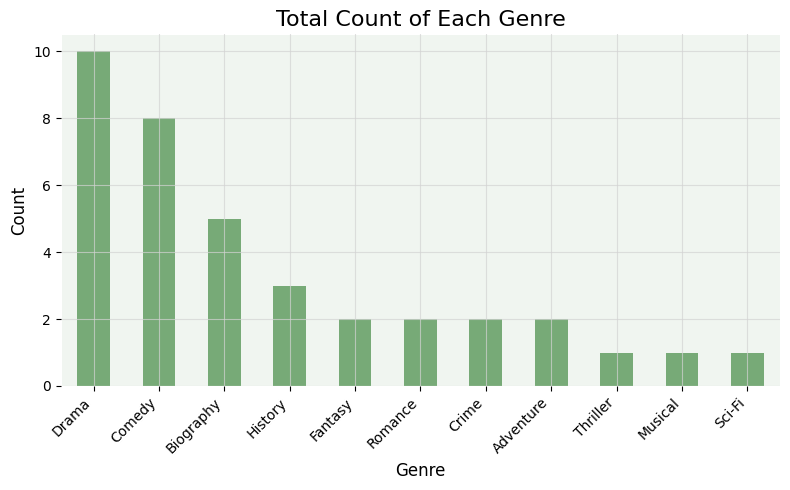

In [279]:
# Calculation
genre_by_count = genre.str.split(', ').explode().value_counts()


# Bar Plot
plt.figure(figsize=(8, 5))
genre_by_count.plot(kind='bar', color='#77AA77')
plt.title('Total Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()